# MLE with Position of Quasars

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.

In [1]:
import numpy as np
import pylab as plt
from scipy.stats import norm

In [4]:
mu = 1
sigma = 0.2
N = 5

np.random.seed(42) # Without setting a seed, every run would give different random values. 42 is “The Answer to the Ultimate Question of Life, the Universe, and Everything.” from The Hitchhiker’s Guide to the Galaxy by Douglas Adams
sample = norm(mu, sigma).rvs(N)

print(sample)

[1.09934283 0.97234714 1.12953771 1.30460597 0.95316933]


- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.

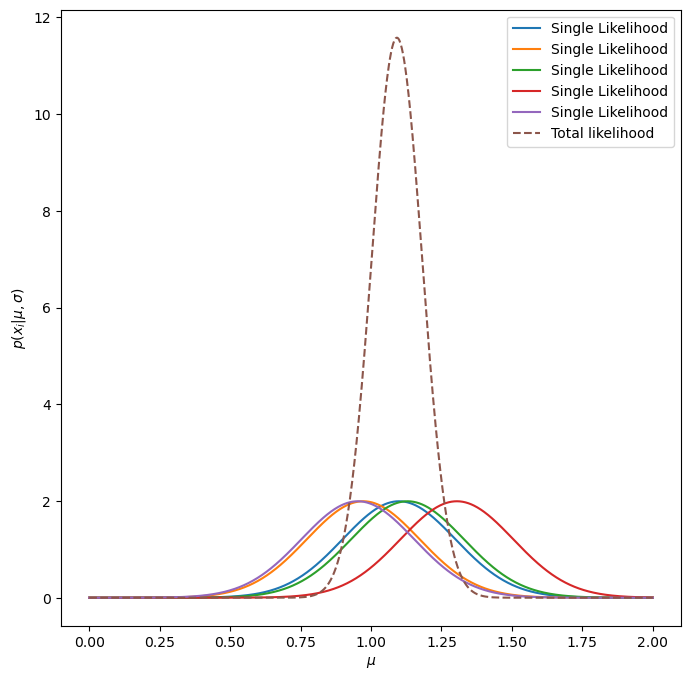

In [14]:
xgrid = np.linspace(0, 2, 1000)

# Compute likelihood for every single value of sample: mean=s, sigma=sigma
Ls = np.array([norm.pdf(xgrid, loc=s, scale=sigma) for s in sample])

# Total likelihood
L = np.prod(Ls, axis=0)

# Different plots in the same canva
fig, ax = plt.subplots(figsize=(8, 8)) 

for thisL in Ls: # F is an array of functions
    plt.plot(xgrid, thisL, ls='-', label = "Single Likelihood")

plt.plot(xgrid, L, ls='--', label = "Total likelihood")

plt.xlabel(r'$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend()



- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 

In [18]:
sorted_indices = np.argsort(L) #  Returns the indices that would sort an array in ascending order
index_max = sorted_indices[-1]
print("Maximum of likelihood = %.3f" % xgrid[index_max])

Maximum of likelihood = 1.091


- Compare it with the MLE estimator derived above

In [ ]:
mean = np.mean(sample)
print("ML estimator = mean = ", mean)

plt.plot(xgrid, L, ls='--', label = "Likelihood")

ML estimator = mean =  1.0918005948650173


### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.


In [ ]:
F_matrix = - np.diff(np.log(L), n=2) / (xgrid[1]-xgrid[0])**2 # oss: np.diff does not divide by (Δ𝑥)^2
sigma_mu = 1/np.sqrt(F_matrix)[index_max]

print("Fisher matrix error on estimated mean =", sigma_mu)

Fisher matrix error on estimated mean = 0.08944271910004176


- Compare with the Fisher matrix error derived above

In [28]:
sigma_MLE = sigma / np.sqrt(N)

print("Error of mean from MLE = ", sigma_MLE)

Error of mean from MLE =  0.08944271909999159


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

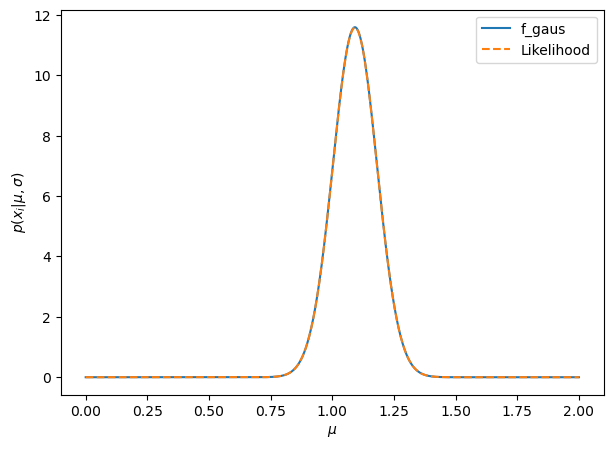

In [39]:
# Plot gaussian with ML Estimators
fig, ax = plt.subplots(figsize=(7, 5))
f_gaus = norm.pdf(xgrid, loc=mean, scale=sigma_MLE)
C = 2.6 # Constant of normalization
plt.plot(xgrid, C*f_gaus, ls='-', label="f_gaus")

# Plot likelihood
plt.plot(xgrid, L, ls='--', label = "Likelihood")

plt.xlabel(r'$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend()

### Part 3 (optional)

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case